In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [2]:
r = requests.get('https://www.infoplease.com/business/poverty-income/percent-people-poverty-state-2002-2010')

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
data[52]

['Wyoming', '9.6', '9.4', '9.9', '10.6', '9.4', '8.7', '9.4', '9.2', '9.6']

In [6]:
pov_df = pd.DataFrame(columns=['State_Name', 'Poverty'])
dic={}
itr=2
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<53:
    lis=[]
    lis.append(data[itr][0].upper())
    lis.append(float(data[itr][8]))
    pov_df.loc[len(pov_df)]=lis
    dic[data[itr][0].upper()]=float(data[itr][6])
    itr+=1

pov_df

54


,State_Name,Poverty
0,ALABAMA,16.6
1,ALASKA,11.7
2,ARIZONA,21.2
3,ARKANSAS,18.9
4,CALIFORNIA,15.3
5,COLORADO,12.3
6,CONNECTICUT,8.4
7,DELAWARE,12.3
8,DISTRICT OF COLUMBIA,17.9
9,FLORIDA,14.6


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
G=nx.read_gml("9.gml")
G.remove_edges_from(nx.selfloop_edges(G))
bins=[]
temp=-25.5
while temp<26:
    bins.append(temp)
    temp+=1

In [9]:
dic['PUERTO RICO']=55
y=0
count=0
x=[]
for u,v,a in G.edges(data=True):
    x+=[round((dic[v.upper()]-dic[u.upper()]),1)]*(a["weight"])
    count=count+a["weight"]
    y=round((dic[v.upper()]-dic[u.upper()]),1)*a["weight"]+y

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.87000e+02, 2.95000e+02, 2.03700e+03,
        4.27200e+03, 1.26030e+04, 3.31550e+04, 2.42470e+04, 8.09800e+04,
        9.15600e+04, 2.05608e+05, 2.17266e+05, 4.11510e+05, 3.75074e+05,
        3.44057e+05, 3.29086e+05, 4.81876e+05, 2.44762e+05, 3.38617e+05,
        1.55928e+05, 1.00515e+05, 5.82120e+04, 3.95760e+04, 1.92480e+04,
        2.92000e+03, 7.58000e+02, 5.23000e+02, 9.09000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00]),
 array([-25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5,
        -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
         -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,
          1.5,   2.5,   3.5,   4.5

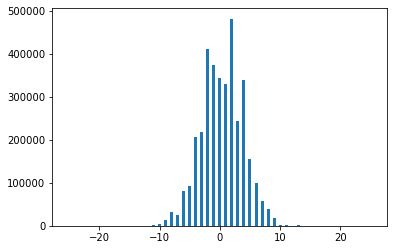

In [10]:
plt.hist(x, bins, histtype='bar', rwidth=0.5)

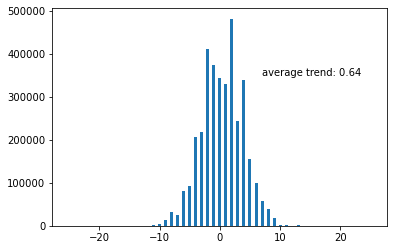

In [14]:
plt.hist(x, bins, histtype='bar', rwidth=0.5)
strr="average trend: "+str(round((y/count),2))
plt.text(7, 3.5*1e5, strr)
fig=plt.gcf()
fig.savefig("povertyTT_USA")
plt.show()
